# Nuages de mots

## Imports et stopwords

In [48]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atcho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "le", "la", "les", "un", "une", "des", "du", "de", "d'", "je", "tu", "il", "elle", "nous", "vous", "ils", "elles", "on", 
 "me", "te", "se", "lui", "leur", "y", "en", "à", "dans", "par", "pour", "en", "vers", "avec", "sans", "sous", "sur", 
 "entre", "chez", "contre", "parmi", "derrière", "devant", "et", "mais", "ou", "donc", "car", "ni", "or", "que", "qu'", 
 "quand", "comme", "si", "puis", "parce que", "puisque", "cependant", "néanmoins", "très", "aussi", "bien", "là", "où", 
 "quand", "ainsi", "après", "avant", "déjà", "encore", "même", "toujours", "parfois", "souvent", "ce", "cet", "cette", 
 "ces", "ceux", "celles", "celui", "celle", "chaque", "tout", "tous", "toute", "toutes", "aucun", "aucune", "plusieurs", 
 "quelque", "quelques", "son", "sa", "ses", "leur", "leurs", "ne", "pas", "rien", "aucun", "aucune", "être", "avoir", 
 "fait", "faites", "fais", "faisait", "faire", "d'", "n'", "au", "aux", "ceci", "cela"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [50]:
# Choisir une année
year = 1955

In [51]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [52]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [53]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [54]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'} ’ rr J \' 1 60\'ANNÊR- N»1 \' r>. JOURNAL QUOTIDIEN 22 Pages -1 fr. 75 r Congo Belge t 3 lr. Franco ! 20 lr. Iran;. — Suisse : 0 lr. 40 suisses CHEQUES POSTAUX PUBLICITE ! Compte n" 5675 Rossai A C ,e '

In [55]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [56]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'} ’ rr J \' 1 60\'ANNÊR- N»1 \' r>. JOURNAL QUOTIDIEN 22 Pages -1 fr. 75 r Congo Belge t 3 lr. Franco ! 20 lr. Iran;. — Suisse : 0 lr. 40 suisses CHEQUES POSTAUX PUBLICITE ! Compte n" 5675 Rossai A C ,e VENTE Soir et Soir Illustré : 14666 RossSl A C 1 * DONS aux Œuvres du Soir : 14232 Bossel A C 1 * Les manuscrits non Insérés ne sont pas rendus i i < -U VENTE. ABONNEM. : 23. PL. DE LOUVAIN ANNONCES t AC. ROSSEL. 122, R. ROYALE FRANCE t Vente, abonnements et annonces : 73. RUE D\'ANIOU, 73 — PARIS <8'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [57]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [58]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1955_clean.txt!'

In [59]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNÊR JOURNAL QUOTIDIEN PAGES CONGO BELGE FRANCO IRAN SUISSE SUISSES CHEQUES POSTAUX PUBLICITE COMPTE ROSSAI VENTE SOIR SOIR ILLUSTRÉ ROSSSL DONS ŒUVRES SOIR BOSSEL MANUSCRITS INSÉRÉS RENDUS VENTE ABONNEM LOUVAIN ANNONCES ROYALE FRANCE VENTE ABONNEMENTS ANNONCES RUE ANIOU PARIS SALLE DEPECHES RUE ROYALE BRUXELLES RÉDACTION LOUVAIN BRUXELLES PARIS RUE BOURSE LONDRES QUEEN VICTORIA STR ZURICH MUHLEBACHSTRASSE PREMIÈRE DEUXIÈME TROISIÈME QUATRIÈME WUII EDLLION NUIT ÉDIT NUIT SAMEDI DIMANCHE IANV TE'

## Nuage de mots

### Afficher les termes les plus fréquents


In [60]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('TÉL', 1918), ('RUE', 1593), ('BRUXELLES', 1042), ('ANS', 737), ('PRIX', 645), ('BON', 566), ('PLACE', 475), ('ECR', 472), ('ECRIRE', 463), ('GRAND', 436)]


### Créer, stocker et afficher le nuage de mots

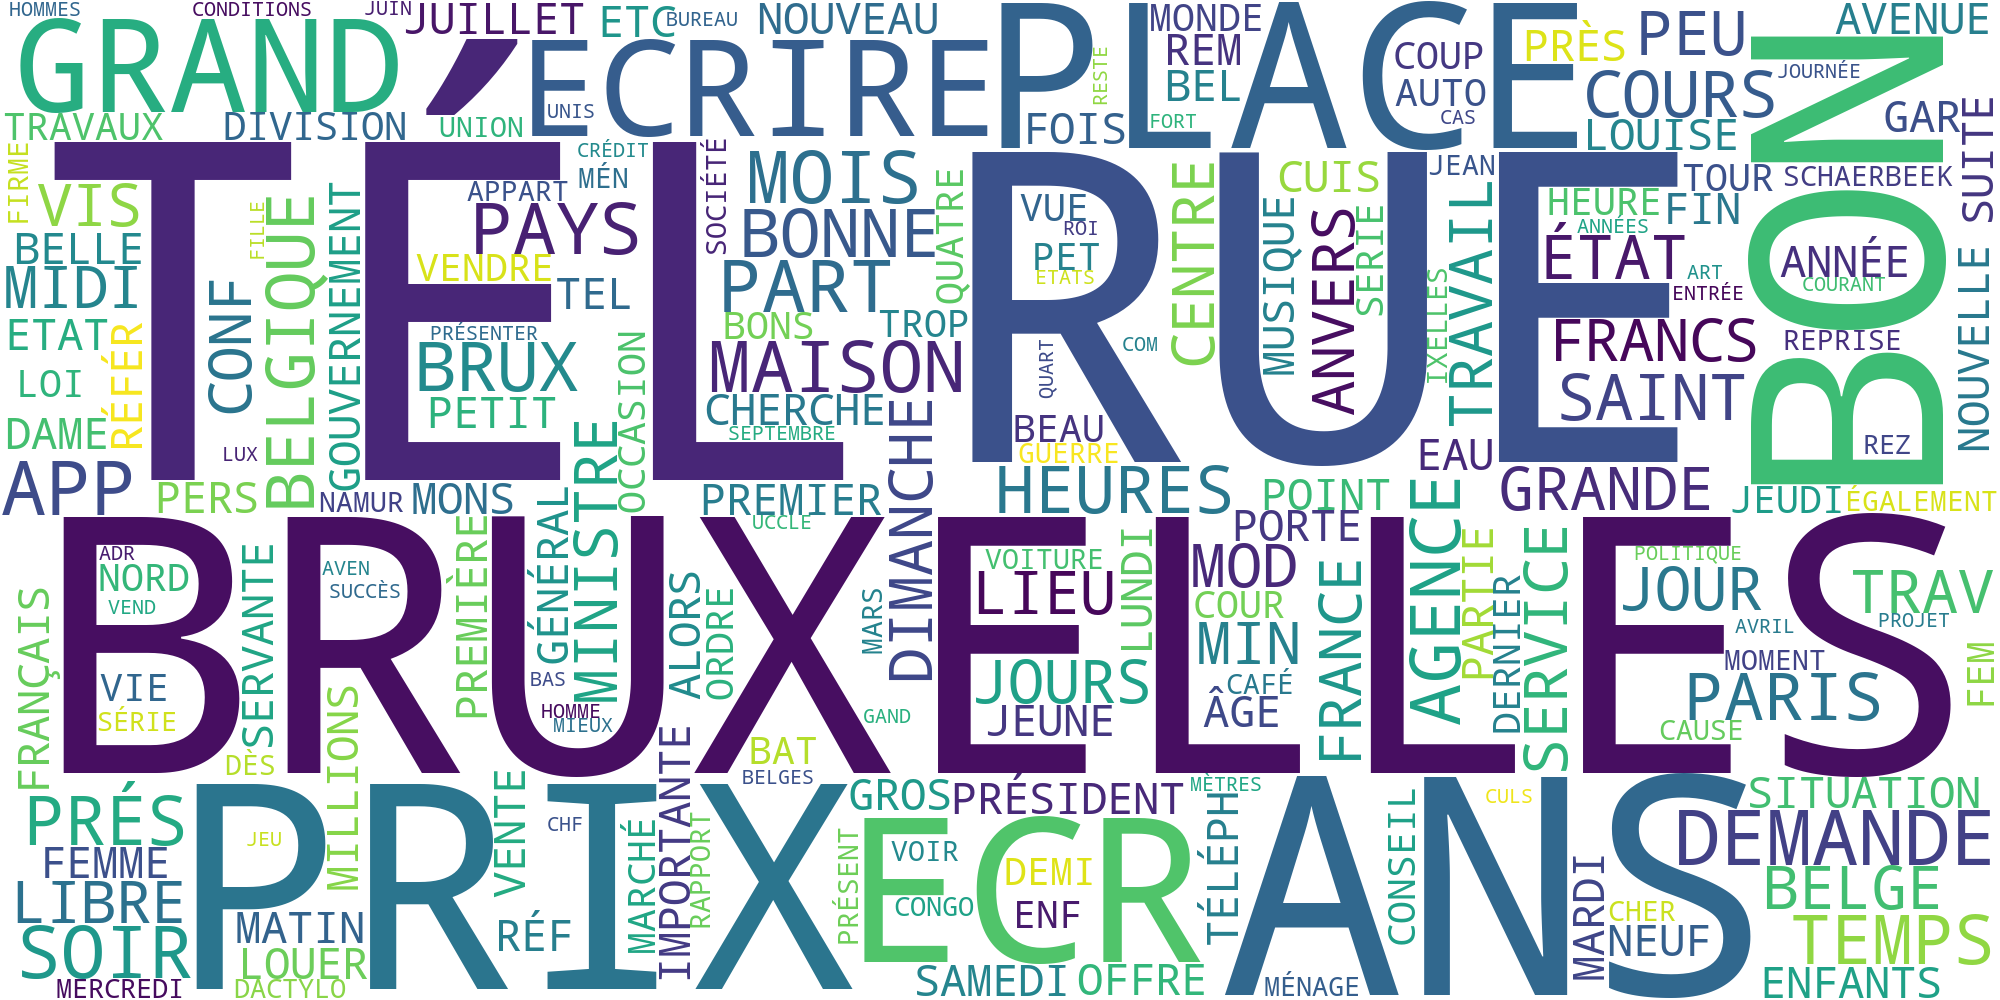

In [61]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))